In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import collections
import scipy.stats

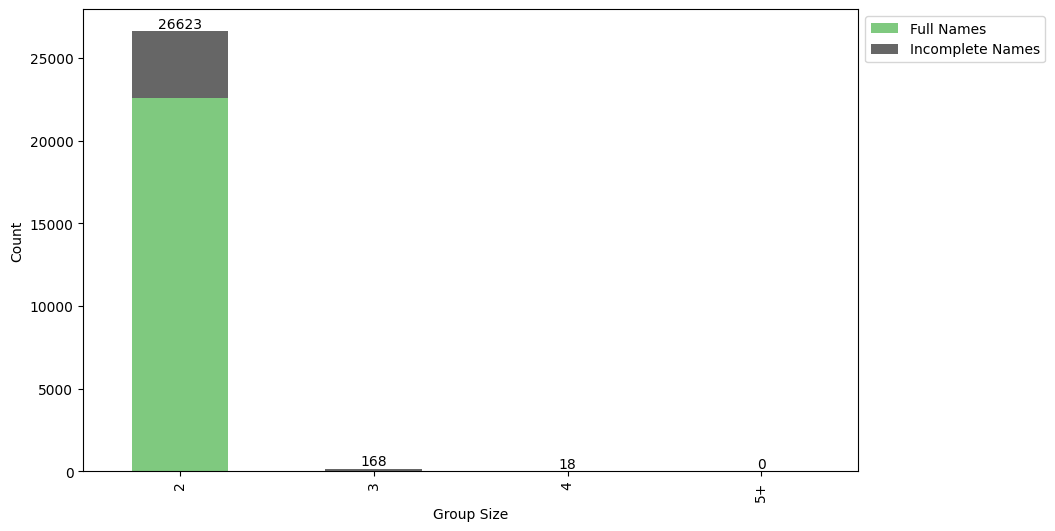

In [ ]:
x_axis = ['2', '3', '4', '5+']
y1 = [26623, 168, 18, 0]
y2 = [22572, 0, 0, 0]
y3 = list(np.array(y1)-np.array(y2))

index = pd.Index(x_axis, name='Group Size')

data = {'Full Names': y2, 'Incomplete Names': y3}
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[1], label_type='edge')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

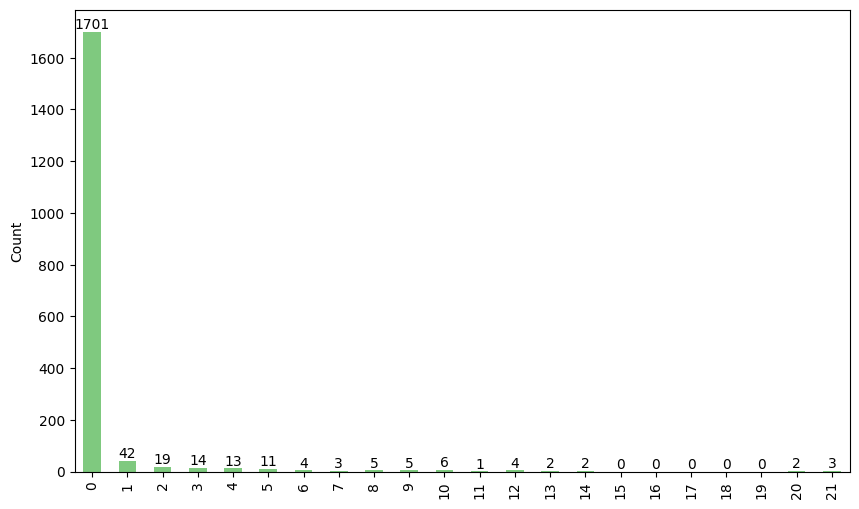

In [ ]:
counts_0 = {0:     1701,
1:       42,
2:       19,
3:       14,
4:       13,
5:       11,
6:        4,
7:        3,
8:        5,
9:        5,
10:       6,
11:       1,
12:       4,
13:       2,
14:       2,
20:       2,
21:       3}
def chart_counts(counts):
  for i in range(max(counts.keys())):
    if i not in counts.keys():
      counts[i]=0
  counts = {x: counts[x] for x in sorted(counts.keys())}
  df = pd.DataFrame(counts.values(), index=counts.keys())
  ax = df.plot(kind='bar', figsize=(10, 6), colormap='Accent')
  ax.set_ylabel('Count')
  ax.bar_label(ax.containers[0], label_type='edge')
  # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.get_legend().remove()
  plt.show()

chart_counts(counts_0)

         mean       std     n
1   11.904762  0.385758  42.0
2   16.421053  0.917663  19.0
3   16.571429  1.336306  14.0
4   33.846154  4.160251  13.0
5   17.818182  2.110579  11.0
6    4.500000  2.250000   4.0
7   15.000000  2.309401   3.0
8    7.000000  1.341641   5.0
9    8.200000  3.577709   5.0
10   7.000000  2.449490   6.0
11   4.642857  0.801784  14.0


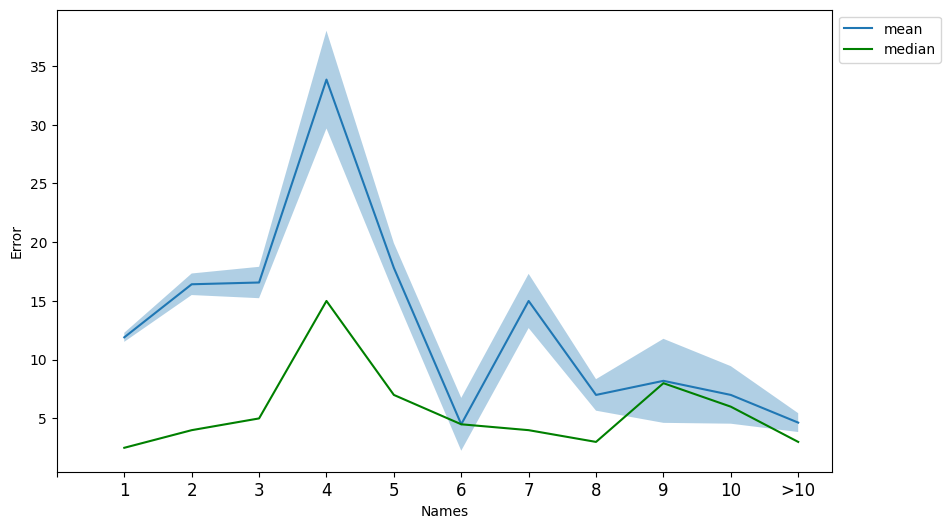

In [ ]:
counts_0 = {
1:       42,
2:       19,
3:       14,
4:       13,
5:       11,
6:        4,
7:        3,
8:        5,
9:        5,
10:       6,
11:      14,
}

counts_2 = {
1:      11.904762,
2:      16.421053,
3:      16.571429,
4:      33.846154,
5:      17.818182,
6:       4.500000,
7:      15.000000,
8:       7.000000,
9:       8.200000,
10:      7.000000,
11:      4.642857}

counts_3 = {
1:     19.646646,
2:     27.315677,
3:     28.405618,
4:     30.626367,
5:     22.480294,
6:      1.290994,
7:     19.052559,
8:      5.477226,
9:      8.438009,
10:     4.979960,
11:     4.413391
}

counts_3 = {
1:       2.5,
2:       4.0,
3:       5.0,
4:      15.0,
5:       7.0,
6:       4.5,
7:       4.0,
8:       3.0,
9:       8.0,
10:      6.0,
11:      3.0
}

def chart_counts_2(counts, counts_std, counts_n, counts_med):
  for i in range(1, max(counts.keys())):
    if i not in counts.keys():
      counts[i]=None
  for i in range(1, max(counts_std.keys())):
    if i not in counts_std.keys():
      counts_std[i]=None
  for i in range(1, max(counts_n.keys())):
    if i not in counts_n.keys():
      counts_n[i]=0
  for i in range(1, max(counts_med.keys())):
    if i not in counts_med.keys():
      counts_med[i]=0
  counts = {x: counts[x] for x in sorted(counts.keys())}
  counts_std = {x: counts_std[x] for x in sorted(counts_std.keys())}
  counts_n = {x: counts_n[x] for x in sorted(counts_n.keys())}
  counts_med = {x: counts_med[x] for x in sorted(counts_med.keys())}
  array = np.array([list(counts.values()), list(counts_std.values()), list(counts_n.values())]).T
  df = pd.DataFrame(array, index=counts.keys(), columns=['mean', 'std', 'n'])
  df['std'] = df['std']/df['n']**0.5
  print(df)
  # ax = df.plot(df['mean'], figsize=(10, 6), colormap='Accent')
  fig, ax = plt.subplots(figsize=(10, 6))#, colormap='Accent')
  ax.plot(counts.keys(), df['mean'], label='mean')
  ax.fill_between(range(1,12), df['mean'] - df['std'], df['mean'] + df['std'], alpha=0.35)
  ax.plot(counts.keys(), counts_med.values(), label='median', color='green')
  ax.set_ylabel('Error')
  ax.set_xlabel('Names')
  ax.set_xticks(range(12)) 
  ax.set_xticklabels(['',1,2,3,4,5,6,7,8,9,10,'>10'], fontsize=12)
  # ax.line_label(ax.containers[0], label_type='edge')
  plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  # ax.get_legend().remove()
  plt.show()

chart_counts_2(counts_2, counts_3, counts_0, counts_3)

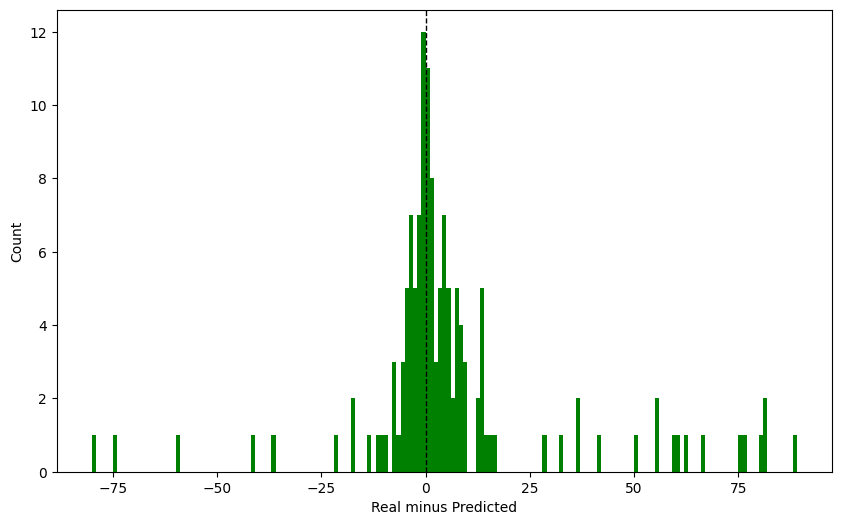

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(errors, max(errors)-min(errors), color='green')
ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
ax.set_ylabel('Count')
ax.set_xlabel('Real minus Predicted')
plt.show()

In [ ]:
e = [abs(x) for x in errors]
ee = [np.percentile(e, i) for i in range(101)]
print(sum(np.array(ee)<=10))
print(sum(np.array(ee)<=20))

72
83


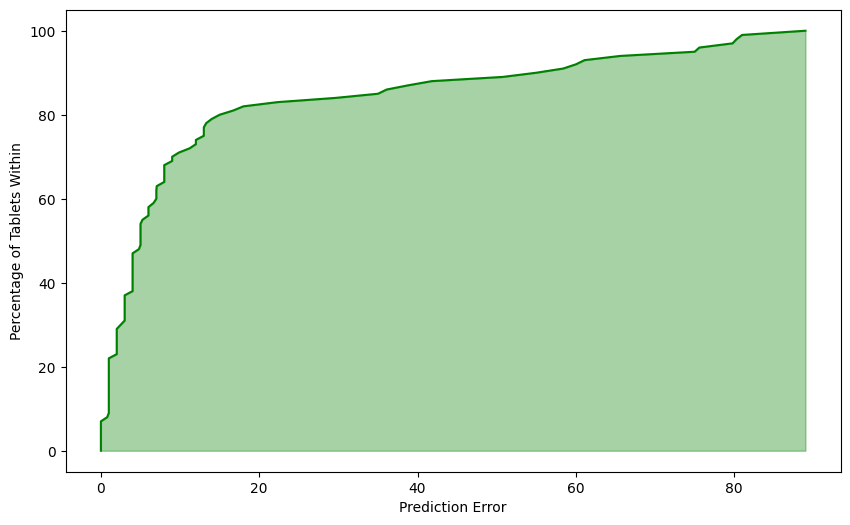

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ee, range(101), color='green')
plt.fill_between(ee, range(101), alpha=0.35, color='green')
ax.set_ylabel('Percentage of Tablets Within')
ax.set_xlabel('Prediction Error')
plt.show()

In [ ]:
np.mean(errors)/(np.std(errors)/len(errors)**0.5)

2.8449675565087507

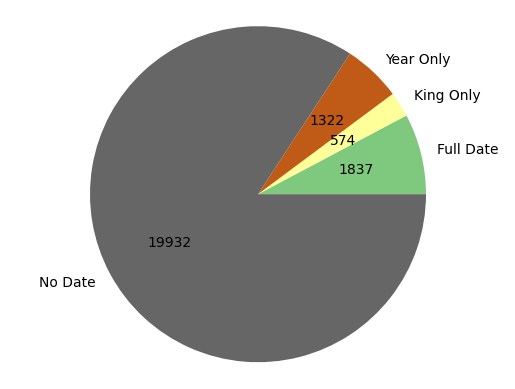

In [ ]:
data = {'Full Date': 1837,
'King Only': 574,
'Year Only': 1322,
'No Date': 19932}
labels = []
sizes = []

for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, colors = plt.get_cmap("Accent")(np.arange(4)*3), autopct= lambda x: '{:.0f}'.format(x*sum(sizes)/100))

plt.axis('equal')
plt.show()

# Long cells

In [ ]:
errors = [81.0, 
13.0, 
0.0, 
0.0, 
-6.0, 
-4.0, 
-1.0, 
0.0, 
55.0, 
9.0, 
-3.0, 
-1.0, 
1.0, 
1.0, 
1.0, 
13.0, 
2.0, 
3.0, 
1.0, 
0.0, 
36.0, 
12.0, 
3.0, 
-1.0, 
-2.0, 
5.0, 
8.0, 
-10.0, 
-2.0, 
-2.0, 
3.0, 
-3.0, 
15.0, 
0.0, 
7.0, 
5.0, 
7.0, 
4.0, 
-8.0, 
3.0, 
75.0, 
16.0, 
1.0, 
0.0, 
-14.0, 
50.0, 
36.0, 
12.0, 
3.0, 
-1.0, 
4.0, 
-18.0, 
-2.0, 
-8.0, 
-1.0, 
-3.0, 
5.0, 
76.0, 
0.0, 
-1.0, 
8.0, 
59.0, 
5.0, 
32.0, 
-60.0, 
-22.0, 
41.0, 
89.0, 
-4.0, 
14.0, 
-4.0, 
-1.0, 
-18.0, 
-2.0, 
-1.0, 
-5.0, 
7.0, 
-37.0, 
4.0, 
7.0, 
-6.0, 
8.0, 
60.0, 
0.0, 
13.0, 
80.0, 
66.0, 
-75.0, 
-12.0, 
28.0, 
-80.0, 
-5.0, 
-1.0, 
-42.0, 
9.0, 
-2.0, 
-4.0, 
-4.0, 
62.0, 
-11.0, 
4.0, 
-5.0, 
7.0, 
-5.0, 
-5.0, 
4.0, 
-7.0, 
-2.0, 
5.0, 
8.0, 
4.0, 
-4.0, 
6.0, 
-8.0, 
4.0, 
2.0, 
-1.0, 
-3.0, 
6.0, 
81.0, 
13.0, 
0.0, 
0.0, 
-6.0, 
-4.0, 
-1.0, 
0.0, 
55.0, 
9.0, 
-3.0, 
-1.0, 
1.0, 
1.0, 
1.0, 
13.0, 
2.0]
errors = [int(x) for x in errors]

In [ ]:
years = [1305, 
1314, 
1286, 
1287, 
1253, 
1285, 
1328, 
1292, 
1295, 
1267, 
1320, 
1313, 
1319, 
1249, 
1305, 
1328, 
1305, 
1304, 
1326, 
1245, 
1252, 
1253, 
1318, 
1322, 
1242, 
1235, 
1244, 
1235, 
1242, 
1238, 
1237, 
1319, 
1328, 
1314, 
1304, 
1289, 
1254, 
1294, 
1294, 
1304, 
1288, 
1289, 
1283, 
1313, 
1243, 
1291, 
1303, 
1293, 
1303, 
1305, 
1305, 
1248, 
1288, 
1253, 
1232, 
1243, 
1293, 
1303, 
1328, 
1254, 
1291, 
1324, 
1298, 
1321, 
1293, 
1236, 
1233, 
1233, 
1299, 
1237, 
1296, 
1292, 
1322, 
1290, 
1253, 
1237, 
1316, 
1236, 
1233, 
1235, 
1277, 
1245, 
1246, 
1239, 
1305, 
1298, 
1301, 
1312, 
1341, 
1301, 
1313, 
1306, 
1304, 
1317, 
1323, 
1304, 
1246, 
1332, 
1315, 
1253, 
1351, 
1245, 
1255, 
1230, 
1305, 
1255, 
1255, 
1287, 
1315, 
1347, 
1255, 
1254, 
1258, 
1253, 
1300, 
1235, 
1255, 
1253, 
1255, 
1254, 
1233, 
1258, 
1230, 
1282, 
1255, 
1351, 
1282, 
1254, 
1245, 
1237, 
1240, 
1282, 
1329, 
1235, 
1233, 
1233, 
1236, 
1255, 
1287, 
1320, 
1285, 
1245, 
1245, 
1236, 
1236, 
1307, 
1239, 
1250, 
1253, 
1241, 
1236, 
1187, 
1318, 
1318, 
1275, 
1344, 
1233, 
1288, 
1271, 
1321, 
1294, 
1360, 
1239, 
1250, 
1248, 
1233, 
1233, 
1332, 
1248, 
1233, 
1305, 
1235, 
1236, 
1233, 
1237, 
1332, 
1321, 
1233, 
1233, 
1238, 
1299, 
1246, 
1255, 
1246, 
1232, 
1229, 
1238, 
1233, 
1231, 
1230, 
1242, 
1228, 
1260, 
1255, 
1262, 
1262, 
1264, 
1242, 
1267, 
1252, 
1262, 
1250, 
1269, 
1250, 
1259, 
1246, 
1249, 
1253, 
1250, 
1254, 
1253, 
1251, 
1250, 
1158, 
1176, 
1167, 
1172, 
1170, 
1158, 
1172, 
1184, 
1179, 
1179, 
1168, 
1178, 
1169, 
1182, 
1242, 
1271, 
1171, 
1187, 
1208, 
1187, 
1224, 
1176, 
1183, 
1181, 
1186, 
1185, 
1181, 
1158, 
1184, 
1158, 
1182, 
1172, 
1233, 
1259, 
1325, 
1325, 
1254, 
1266, 
1254, 
1258, 
1237, 
1325, 
1301, 
1304, 
1298, 
1290, 
1307, 
1297, 
1285, 
1297, 
1306, 
1297, 
1294, 
1295, 
1290, 
1305, 
1308, 
1287, 
1296, 
1294, 
1294, 
1295, 
1295, 
1316, 
1316, 
1312, 
1316, 
1316, 
1316, 
1321, 
1322, 
1319, 
1321, 
1320, 
1318, 
1313, 
1320, 
1311, 
1329, 
1270, 
1267, 
1269, 
1292, 
1298, 
1295, 
1281, 
1280, 
1273, 
1269, 
1269, 
1272, 
1270, 
1275, 
1282, 
1269, 
1264, 
1273, 
1270, 
1274, 
1279, 
1270, 
1271, 
1268, 
1277, 
1269, 
1269, 
1282, 
1276, 
1268, 
1294, 
1289, 
1299, 
1290, 
1296, 
1246, 
1336, 
1287, 
1295, 
1246, 
1319, 
1285, 
1286, 
1285, 
1285, 
1228, 
1240, 
1321, 
1317, 
1235, 
1328, 
1248, 
1350, 
1317, 
1305, 
1280, 
1300, 
1233, 
1291, 
1293, 
1291, 
1333, 
1313, 
1237, 
1233, 
1238, 
1237, 
1320, 
1305, 
1251, 
1259, 
1246, 
1286, 
1293, 
1293, 
1312, 
1317, 
1251, 
1307, 
1240, 
1269, 
1249, 
1245, 
1287, 
1239, 
1332, 
1236, 
1251, 
1314, 
1251, 
1300, 
1244, 
1250, 
1294, 
1248, 
1288, 
1330, 
1229, 
1312, 
1330, 
1314, 
1235, 
1292, 
1293, 
1291, 
1242, 
1269, 
1324, 
1295, 
1246, 
1285, 
1321, 
1320, 
1306, 
1258, 
1253, 
1307, 
1235, 
1337, 
1269, 
1233, 
1258, 
1239, 
1224, 
1299, 
1253, 
1336, 
1235, 
1254, 
1254, 
1253, 
1277, 
1253, 
1289, 
1358, 
1331, 
1252, 
1231, 
1252, 
1259, 
1254, 
1282, 
1254, 
1255, 
1253, 
1311, 
1233, 
1299, 
1236, 
1258, 
1328, 
1301, 
1253, 
1287, 
1237, 
1254, 
1267, 
1264, 
1304, 
1252, 
1233, 
1245, 
1291, 
1233, 
1253, 
1255, 
1253, 
1295, 
1268, 
1253, 
1255, 
1254, 
1254, 
1250, 
1253, 
1253, 
1252, 
1231, 
1240, 
1233, 
1290, 
1254, 
1255, 
1253, 
1255, 
1254, 
1235, 
1253, 
1233, 
1253, 
1255, 
1253, 
1258, 
1307, 
1318, 
1292, 
1240, 
1314, 
1342, 
1295, 
1287, 
1285, 
1273, 
1287, 
1235, 
1317, 
1322, 
1357, 
1295, 
1233, 
1288, 
1285, 
1352, 
1314, 
1255, 
1306, 
1301, 
1336, 
1303, 
1326, 
1321, 
1350, 
1294, 
1292, 
1237, 
1237, 
1236, 
1241, 
1298, 
1255, 
1237, 
1317, 
1316, 
1314, 
1325, 
1321, 
1237, 
1321, 
1304, 
1349, 
1292, 
1235, 
1236, 
1239, 
1236, 
1235, 
1235, 
1318, 
1355, 
1307, 
1269, 
1269, 
1269, 
1269, 
1293, 
1279, 
1293, 
1293, 
1295, 
1292, 
1294, 
1293, 
1295, 
1327, 
1291, 
1249, 
1328, 
1255, 
1320, 
1295, 
1321, 
1295, 
1246, 
1313, 
1317, 
1308, 
1244, 
1290, 
1341, 
1318, 
1308, 
1232, 
1233, 
1246, 
1357, 
1320, 
1313, 
1316, 
1249, 
1319, 
1315, 
1313, 
1313, 
1312, 
1305, 
1314, 
1291, 
1337, 
1296, 
1233, 
1316, 
1295, 
1314, 
1327, 
1327, 
1235, 
1250, 
1267, 
1320, 
1304, 
1314, 
1353, 
1304, 
1313, 
1340, 
1308, 
1355, 
1239, 
1246, 
1237, 
1241, 
1235, 
1255, 
1341, 
1224, 
1255, 
1258, 
1233, 
1297, 
1233, 
1299, 
1233, 
1318, 
1307, 
1270, 
1301, 
1292, 
1258, 
1304, 
1258, 
1255, 
1254, 
1253, 
1253, 
1253, 
1253, 
1292, 
1253, 
1337, 
1349, 
1258, 
1340, 
1340, 
1248, 
1235, 
1304, 
1253, 
1251, 
1254, 
1254, 
1253, 
1254, 
1254, 
1254, 
1254, 
1255, 
1254, 
1255, 
1259, 
1255, 
1253, 
1282, 
1310, 
1246, 
1239, 
1237, 
1325, 
1301, 
1304, 
1298, 
1290, 
1307, 
1297, 
1285, 
1297, 
1306, 
1297, 
1294, 
1295, 
1290, 
1305, 
1308, 
1287, 
1296, 
1294, 
1294, 
1295, 
1295, 
1316, 
1316, 
1312, 
1316, 
1316, 
1316, 
1321, 
1322, 
1319, 
1321, 
1320, 
1318, 
1313, 
1320, 
1311, 
1329, 
1270, 
1267, 
1269, 
1292, 
1298, 
1295, 
1281, 
1280, 
1273, 
1269, 
1269, 
1272, 
1270, 
1275, 
1282, 
1269, 
1264, 
1273, 
1270, 
1274, 
1279, 
1270, 
1271, 
1268, 
1277, 
1269, 
1269, 
1282, 
1276, 
1268, 
1294, 
1289, 
1299, 
1290, 
1296, 
1246, 
1336, 
1287, 
1295, 
1246, 
1319, 
1285, 
1286, 
1285, 
1285, 
1228, 
1240, 
1321, 
1317, 
1235, 
1328, 
1248, 
1350, 
1317, 
1305, 
1280, 
1300, 
1233, 
1291, 
1293, 
1291, 
1333, 
1313, 
1237, 
1233, 
1238, 
1237, 
1320, 
1305, 
1251, 
1259, 
1246, 
1286, 
1293, 
1293, 
1312, 
1317, 
1251, 
1307, 
1240, 
1269, 
1249, 
1245, 
1287, 
1239, 
1332, 
1251, 
1314, 
1251, 
1300, 
1244, 
1250, 
1294, 
1248, 
1288, 
1330, 
1229, 
1312, 
1330, 
1314, 
1235, 
1292, 
1293, 
1291, 
1242, 
1269, 
1324, 
1295, 
1246, 
1285, 
1321, 
1320, 
1306, 
1258, 
1253, 
1307, 
1235, 
1337, 
1269, 
1233, 
1258, 
1239, 
1224, 
1299, 
1253, 
1336, 
1235, 
1254, 
1254, 
1253, 
1277, 
1253, 
1289, 
1358, 
1331, 
1252, 
1231, 
1252, 
1259, 
1254, 
1282, 
1254, 
1255, 
1253, 
1311, 
1233, 
1299, 
1236, 
1258, 
1328, 
1301, 
1253, 
1287, 
1237, 
1254, 
1267, 
1264, 
1304, 
1252, 
1233, 
1245, 
1291, 
1233, 
1253, 
1255, 
1253, 
1295, 
1268, 
1253, 
1255, 
1254, 
1254, 
1250, 
1253, 
1253, 
1231, 
1240, 
1233, 
1290, 
1254, 
1255, 
1253, 
1255, 
1254, 
1235, 
1253, 
1233, 
1253, 
1255, 
1253, 
1258, 
1307, 
1318, 
1292, 
1240, 
1314, 
1342, 
1287, 
1285, 
1287, 
1235, 
1317, 
1322, 
1357, 
1295, 
1233, 
1288, 
1285, 
1352, 
1314, 
1255, 
1247, 
1232, 
1231, 
1231, 
1232, 
1233, 
1232, 
1229, 
1278, 
1271, 
1270, 
1272, 
1271, 
1272, 
1275, 
1269, 
1269, 
1270, 
1290, 
1272, 
1270, 
1271, 
1280, 
1271, 
1282, 
1280, 
1282, 
1271, 
1272, 
1264, 
1272, 
1281, 
1275, 
1277, 
1281, 
1276, 
1289, 
1285, 
1280, 
1282, 
1291, 
1278, 
1343, 
1280, 
1277, 
1275, 
1269, 
1285, 
1287, 
1253, 
1271, 
1272, 
1277, 
1252, 
1271, 
1286, 
1305, 
1292, 
1259, 
1282, 
1282, 
1275, 
1274, 
1271, 
1274, 
1291, 
1274, 
1274, 
1288, 
1262, 
1280, 
1282, 
1273, 
1274, 
1270, 
1275, 
1271, 
1246, 
1282, 
1280, 
1274, 
1274, 
1274, 
1291, 
1262, 
1281, 
1274, 
1274, 
1270, 
1272, 
1291, 
1264, 
1274, 
1291, 
1250, 
1282, 
1283, 
1274, 
1301, 
1276, 
1264, 
1301, 
1300, 
1272, 
1270, 
1300, 
1251, 
1243, 
1267, 
1268, 
1269, 
1296, 
1277, 
1271, 
1293, 
1281, 
1291, 
1250, 
1282, 
1270, 
1281, 
1280, 
1293, 
1271, 
1282, 
1271, 
1276, 
1300, 
1297, 
1293, 
1246, 
1246, 
1245, 
1243, 
1244, 
1280, 
1294, 
1246, 
1246, 
1245, 
1245, 
1245, 
1246, 
1245, 
1250, 
1246, 
1245, 
1244, 
1245, 
1295, 
1246, 
1276, 
1293, 
1274, 
1248, 
1244, 
1246, 
1246, 
1246, 
1245, 
1246, 
1248, 
1269, 
1282, 
1292, 
1245, 
1250, 
1249, 
1251, 
1246, 
1247, 
1246, 
1245, 
1245, 
1250, 
1245, 
1262, 
1246, 
1246, 
1250, 
1246, 
1245, 
1248, 
1269, 
1248, 
1246, 
1251, 
1250, 
1260, 
1246, 
1245, 
1245, 
1249, 
1278, 
1252, 
1246, 
1245, 
1246, 
1268, 
1251, 
1277, 
1272, 
1246, 
1246, 
1246, 
1246, 
1246, 
1246, 
1245, 
1245, 
1246, 
1245, 
1246, 
1245, 
1246, 
1245, 
1245, 
1246, 
1245, 
1245, 
1245, 
1246, 
1245, 
1248, 
1249, 
1246, 
1268, 
1287, 
1269, 
1273, 
1251, 
1259, 
1250, 
1273, 
1271, 
1248, 
1251, 
1245, 
1245, 
1266, 
1269, 
1270, 
1192, 
1249, 
1246, 
1248, 
1251, 
1271, 
1279, 
1266, 
1248, 
1245, 
1271, 
1250, 
1233, 
1273, 
1248, 
1285, 
1255, 
1248, 
1248, 
1273, 
1268, 
1273, 
1271, 
1275, 
1278, 
1267, 
1274, 
1248, 
1254, 
1245, 
1246, 
1246, 
1271, 
1269, 
1272, 
1268, 
1272, 
1286, 
1286, 
1247, 
1246, 
1251, 
1246, 
1276, 
1277, 
1269, 
1267, 
1276, 
1276, 
1273, 
1296, 
1274, 
1281, 
1268, 
1288, 
1276, 
1288, 
1245, 
1248, 
1281, 
1276, 
1275, 
1245, 
1279, 
1274, 
1246, 
1301, 
1250, 
1282, 
1267, 
1245, 
1258, 
1271, 
1268, 
1246, 
1272, 
1300, 
1245, 
1245, 
1245, 
1271, 
1244, 
1270, 
1271, 
1275, 
1252, 
1246, 
1281, 
1272, 
1246, 
1246, 
1246, 
1248, 
1281, 
1280, 
1246, 
1251, 
1230, 
1270, 
1269, 
1249, 
1271, 
1300, 
1246, 
1301, 
1271, 
1290, 
1290, 
1261, 
1245, 
1244, 
1248, 
1302, 
1246, 
1250, 
1246, 
1255, 
1255, 
1307, 
1272, 
1271, 
1244, 
1266, 
1286, 
1278, 
1289, 
1246, 
1259, 
1273, 
1242, 
1271, 
1258, 
1270, 
1288, 
1280, 
1247, 
1251, 
1251, 
1248, 
1270, 
1251, 
1251, 
1246, 
1246, 
1277, 
1290, 
1303, 
1287, 
1268, 
1285, 
1268, 
1292, 
1270, 
1251, 
1294, 
1270, 
1230, 
1296, 
1253, 
1285, 
1286, 
1282, 
1288, 
1291, 
1231, 
1279, 
1273, 
1275, 
1268, 
1236, 
1240, 
1286, 
1269, 
1246, 
1237, 
1295, 
1238, 
1243, 
1237, 
1238, 
1246, 
1220, 
1280, 
1287, 
1290, 
1233, 
1249, 
1182, 
1242, 
1280, 
1272, 
1269, 
1343, 
1344, 
1306, 
1294, 
1297, 
1239, 
1304, 
1251, 
1167, 
1251, 
1231, 
1229, 
1230, 
1229, 
1230, 
1231, 
1231, 
1231, 
1226, 
1231, 
1230, 
1229, 
1230, 
1229, 
1230, 
1293, 
1232, 
1262, 
1224, 
1227, 
1206, 
1211, 
1215, 
1238, 
1178, 
1230, 
1223, 
1223, 
1231, 
1168, 
1230, 
1231, 
1224, 
1241, 
1215, 
1230, 
1253, 
1268, 
1246, 
1215, 
1245, 
1251, 
1287, 
1304, 
1233, 
1287, 
1299, 
1287, 
1245, 
1329, 
1336, 
1239, 
1351, 
1351, 
1257, 
1260, 
1243, 
1320, 
1237, 
1278, 
1231, 
1233, 
1328, 
1253, 
1237, 
1307, 
1316, 
1272, 
1259, 
1351, 
1255, 
1227, 
1353, 
1347, 
1351, 
1298, 
1358, 
1280, 
1257, 
1320, 
1299, 
1304, 
1325, 
1233, 
1241, 
1298, 
1291, 
1235, 
1268, 
1246, 
1259, 
1269, 
1253, 
1233, 
1297, 
1252, 
1246, 
1351, 
1255, 
1300, 
1300, 
1254, 
1296, 
1291, 
1269, 
1255, 
1242, 
1259, 
1258, 
1243, 
1233, 
1235, 
1347, 
1246, 
1285, 
1282, 
1295, 
1305, 
1294, 
1242, 
1289, 
1236, 
1232, 
1237, 
1233, 
1328, 
1286, 
1323, 
1354, 
1292, 
1237, 
1288, 
1345, 
1255, 
1294, 
1343, 
1287, 
1246, 
1355, 
1239, 
1285, 
1347, 
1233, 
1287, 
1287, 
1291, 
1295, 
1233, 
1235, 
1233, 
1235, 
1246, 
1316, 
1299, 
1298, 
1292, 
1318, 
1233, 
1286, 
1296, 
1233, 
1277, 
1233, 
1299, 
1287, 
1235, 
1281, 
1279, 
1230, 
1285, 
1361, 
1289, 
1350, 
1293, 
1336, 
1237, 
1233, 
1304, 
1291, 
1233, 
1298, 
1294, 
1278, 
1235, 
1298, 
1236, 
1243, 
1297, 
1336, 
1233, 
1233, 
1349, 
1233, 
1229, 
1233, 
1233, 
1297, 
1255, 
1258, 
1241, 
1233, 
1238, 
1239, 
1294, 
1233, 
1238, 
1230, 
1233, 
1260, 
1252, 
1279, 
1239, 
1235, 
1239, 
1338, 
1293, 
1315, 
1298, 
1236, 
1255, 
1237, 
1246, 
1343, 
1243, 
1246, 
1317, 
1301, 
1255, 
1254, 
1295, 
1254, 
1304, 
1287, 
1253, 
1254, 
1255, 
1317, 
1255, 
1254, 
1292, 
1246, 
1240, 
1255, 
1281, 
1253, 
1254, 
1233, 
1299, 
1230, 
1274, 
1231, 
1231, 
1275, 
1252, 
1236, 
1290, 
1273, 
1254, 
1231, 
1275, 
1236, 
1304, 
1290, 
1233, 
1236, 
1340, 
1288, 
1254, 
1317, 
1239, 
1255, 
1255, 
1253, 
1254, 
1233, 
1328, 
1246, 
1237, 
1233, 
1236, 
1237, 
1235, 
1236, 
1235, 
1235, 
1237, 
1302, 
1249, 
1242, 
1235, 
1251, 
1235, 
1236, 
1246, 
1348, 
1236, 
1251, 
1250, 
1246, 
1244, 
1235, 
1251, 
1233, 
1251, 
1248, 
1250, 
1236, 
1251, 
1253, 
1254, 
1262, 
1264, 
1274, 
1224, 
1254, 
1254, 
1172, 
1250, 
1294, 
1278, 
1305, 
1314, 
1286, 
1287, 
1253, 
1285, 
1328, 
1292, 
1295, 
1267, 
1253, 
1320, 
1313, 
1319, 
1249, 
1305, 
1328, 
1305, 
1304, 
1326, 
1245, 
1252, 
1253, 
1318, 
1259, 
1322, 
1242, 
1235, 
1244, 
1235, 
1242, 
1238, 
1237, 
1319, 
1328, 
1314, 
1304, 
1289, 
1254, 
1294, 
1294, 
1304, 
1288, 
1289, 
1283, 
1313, 
1243, 
1291, 
1303, 
1293, 
1303, 
1305, 
1305, 
1248, 
1288, 
1253, 
1232, 
1243, 
1293, 
1293, 
1303, 
1328, 
1254, 
1291, 
1324, 
1298, 
1321, 
1290, 
1236, 
1325, 
1235, 
1236, 
1233, 
1233, 
1299, 
1237, 
1296, 
1292, 
1322, 
1290, 
1253, 
1237, 
1316, 
1236, 
1233, 
1235, 
1277, 
1245, 
1246, 
1239, 
1305, 
1298, 
1301, 
1312, 
1341, 
1301, 
1313, 
1306, 
1304, 
1317, 
1323, 
1304, 
1246, 
1332, 
1315, 
1253, 
1351, 
1245, 
1255, 
1230, 
1305, 
1255, 
1255, 
1287, 
1315, 
1347, 
1255, 
1254, 
1258, 
1253, 
1300, 
1235, 
1255, 
1253, 
1255, 
1255, 
1254, 
1233, 
1258, 
1230, 
1282, 
1255, 
1351, 
1282, 
1254, 
1245, 
1237, 
1240, 
1282, 
1329, 
1235, 
1233, 
1233, 
1236, 
1255, 
1287, 
1320, 
1285, 
1258, 
1262, 
1254, 
1255, 
1246, 
1259, 
1246, 
1255]

In [ ]:
preds = [1323, 
1318, 
1320, 
1241, 
1257, 
1309, 
1269, 
1311, 
1317, 
1311, 
1313, 
1251, 
1319, 
1319, 
1320, 
1294, 
1240, 
1269, 
1250, 
1313, 
1239, 
1251, 
1244, 
1240, 
1243, 
1308, 
1320, 
1312, 
1239, 
1243, 
1320, 
1336, 
1317, 
1224, 
1318, 
1251, 
1302, 
1239, 
1248, 
1239, 
1241, 
1294, 
1292, 
1247, 
1241, 
1331, 
1272, 
1244, 
1319, 
1237, 
1242, 
1239, 
1320, 
1318, 
1233, 
1240, 
1240, 
1240, 
1320, 
1248, 
1247, 
1320, 
1279, 
1244, 
1249, 
1250, 
1237, 
1306, 
1320, 
1244, 
1320, 
1294, 
1321, 
1266, 
1246, 
1319, 
1275, 
1312, 
1320, 
1244, 
1249, 
1243, 
1246, 
1245, 
1250, 
1336, 
1251, 
1239, 
1242, 
1317, 
1244, 
1265, 
1321, 
1239, 
1277, 
1248, 
1320, 
1318, 
1312, 
1250, 
1321, 
1320, 
1256, 
1239, 
1237, 
1296, 
1320, 
1322, 
1314, 
1238, 
1314, 
1308, 
1259, 
1249, 
1237, 
1261, 
1282, 
1280, 
1256, 
1319, 
1320, 
1303, 
1319, 
1320, 
1308, 
1323, 
1289, 
1243, 
1226, 
1278, 
1315, 
1248, 
1245, 
1265, 
1239, 
1302, 
1320, 
1300, 
1319, 
1239, 
1320, 
1268, 
1254, 
1224, 
1245, 
1238, 
1367, 
1320, 
1316, 
1312, 
1250, 
1241, 
1252, 
1320, 
1320, 
1312, 
1259, 
1264, 
1239, 
1316, 
1253, 
1246, 
1320, 
1239, 
1244, 
1235, 
1253, 
1312, 
1246, 
1238, 
1295, 
1235, 
1320, 
1253, 
1244, 
1246, 
1292, 
1282, 
1165, 
1294, 
1243, 
1253, 
1239, 
1239, 
1304, 
1312, 
1254, 
1311, 
1243, 
1282, 
1235, 
1269, 
1245, 
1320, 
1233, 
1254, 
1244, 
1241, 
1241, 
1251, 
1255, 
1239, 
1258, 
1249, 
1246, 
1277, 
1246, 
1243, 
1322, 
1239, 
1315, 
1249, 
1247, 
1244, 
1237, 
1306, 
1367, 
1237, 
1322, 
1224, 
1231, 
1239, 
1245, 
1318, 
1240, 
1321, 
1320, 
1228, 
1314, 
1322, 
1324, 
1258, 
1259, 
1231, 
1237, 
1239, 
1244, 
1320, 
1291, 
1291, 
1295, 
1239, 
1295, 
1293, 
1295, 
1250, 
1320, 
1294, 
1309, 
1299, 
1239, 
1282, 
1280, 
1239, 
1284, 
1239, 
1239, 
1355, 
1239, 
1285, 
1320, 
1258, 
1290, 
1320, 
1273, 
1314, 
1246, 
1320, 
1320, 
1246, 
1244, 
1254, 
1307, 
1291, 
1291, 
1318, 
1300, 
1320, 
1244, 
1251, 
1239, 
1224, 
1321, 
1246, 
1239, 
1319, 
1239, 
1237, 
1282, 
1311, 
1320, 
1254, 
1313, 
1239, 
1237, 
1258, 
1257, 
1235, 
1279, 
1313, 
1270, 
1319, 
1320, 
1320, 
1320, 
1239, 
1306, 
1250, 
1248, 
1282, 
1244, 
1245, 
1257, 
1270, 
1282, 
1321, 
1320, 
1296, 
1319, 
1314, 
1246, 
1320, 
1355, 
1331, 
1240, 
1290, 
1239, 
1290, 
1320, 
1282, 
1322, 
1245, 
1239, 
1294, 
1253, 
1235, 
1280, 
1244, 
1245, 
1322, 
1320, 
1295, 
1239, 
1285, 
1264, 
1238, 
1253, 
1262, 
1239, 
1248, 
1336, 
1233, 
1255, 
1320, 
1304, 
1255, 
1351, 
1252, 
1239, 
1282, 
1367, 
1248, 
1237, 
1246, 
1248, 
1239, 
1245, 
1328, 
1251, 
1238, 
1328, 
1251, 
1320, 
1238, 
1238, 
1239, 
1250, 
1235, 
1321, 
1238, 
1320, 
1320, 
1248, 
1295, 
1238, 
1241, 
1230, 
1243, 
1230, 
1230, 
1230, 
1230, 
1230, 
1240, 
1259, 
1319, 
1239, 
1271, 
1237, 
1166, 
1237, 
1321, 
1246, 
1300, 
1257, 
1288, 
1245, 
1320, 
1244, 
1310, 
1315, 
1310, 
1319, 
1314, 
1318, 
1251, 
1319, 
1244, 
1243, 
1246, 
1245, 
1293, 
1243, 
1243, 
1244, 
1242, 
1246, 
1306, 
1313, 
1314, 
1249, 
1249, 
1242, 
1318, 
1316, 
1316, 
1304, 
1251, 
1243, 
1313, 
1246, 
1244, 
1261, 
1242, 
1250, 
1297, 
1239, 
1315, 
1318, 
1281, 
1311, 
1314, 
1238, 
1238, 
1246, 
1245, 
1294, 
1244, 
1243, 
1242, 
1311, 
1323, 
1323, 
1318, 
1341, 
1237, 
1311, 
1298, 
1320, 
1279, 
1317, 
1239, 
1239, 
1231, 
1365, 
1245, 
1256, 
1242, 
1345, 
1313, 
1310, 
1318, 
1310, 
1317, 
1246, 
1246, 
1246, 
1328, 
1282, 
1266, 
1267, 
1239, 
1241, 
1320, 
1251, 
1247, 
1239, 
1240, 
1239, 
1313, 
1320, 
1253, 
1246, 
1312, 
1244, 
1300, 
1255, 
1235, 
1242, 
1321, 
1326, 
1298, 
1314, 
1313, 
1320, 
1249, 
1242, 
1246, 
1310, 
1309, 
1312, 
1241, 
1316, 
1244, 
1238, 
1319, 
1323, 
1235, 
1310, 
1244, 
1320, 
1318, 
1320, 
1247, 
1310, 
1318, 
1224, 
1241, 
1237, 
1246, 
1307, 
1307, 
1323, 
1275, 
1238, 
1251, 
1320, 
1319, 
1340, 
1312, 
1304, 
1239, 
1239, 
1333, 
1294, 
1239, 
1240, 
1238, 
1251, 
1273, 
1243, 
1242, 
1250, 
1238, 
1238, 
1238, 
1313, 
1238, 
1243, 
1262, 
1317, 
1237, 
1320, 
1275, 
1320, 
1316, 
1315, 
1298, 
1248, 
1239, 
1237, 
1246, 
1312, 
1238, 
1312, 
1304, 
1255, 
1239, 
1253, 
1246, 
1314, 
1318, 
1322, 
1288, 
1242, 
1308, 
1256, 
1319, 
1320, 
1320, 
1243, 
1243, 
1323, 
1318, 
1320, 
1285, 
1239, 
1245, 
1304, 
1224, 
1320, 
1320, 
1320, 
1320, 
1318, 
1240, 
1307, 
1307, 
1297, 
1247, 
1314, 
1276, 
1320, 
1323, 
1312, 
1317, 
1240, 
1241, 
1319, 
1299, 
1257, 
1306, 
1244, 
1255, 
1294, 
1294, 
1256, 
1312, 
1320, 
1318, 
1239, 
1311, 
1314, 
1252, 
1300, 
1241, 
1294, 
1239, 
1324, 
1231, 
1250, 
1237, 
1306, 
1314, 
1239, 
1243, 
1239, 
1314, 
1224, 
1313, 
1313, 
1314, 
1318, 
1239, 
1320, 
1237, 
1239, 
1320, 
1318, 
1314, 
1243, 
1320, 
1239, 
1320, 
1240, 
1237, 
1313, 
1238, 
1325, 
1319, 
1319, 
1285, 
1243, 
1246, 
1306, 
1312, 
1320, 
1329, 
1305, 
1242, 
1322, 
1243, 
1248, 
1320, 
1317, 
1238, 
1320, 
1239, 
1300, 
1340, 
1300, 
1320, 
1340, 
1325, 
1320, 
1241, 
1311, 
1272, 
1312, 
1251, 
1247, 
1261, 
1237, 
1320, 
1239, 
1240, 
1320, 
1355, 
1314, 
1319, 
1304, 
1239, 
1239, 
1302, 
1296, 
1237, 
1320, 
1320, 
1319, 
1246, 
1305, 
1237, 
1319, 
1304, 
1258, 
1319, 
1238, 
1248, 
1318, 
1314, 
1235, 
1273, 
1238, 
1233, 
1238, 
1320, 
1250, 
1261, 
1235, 
1312, 
1239, 
1236, 
1246, 
1320, 
1235, 
1240, 
1300, 
1314, 
1320, 
1239, 
1295, 
1244, 
1257, 
1244, 
1329, 
1258, 
1337, 
1239, 
1243, 
1288, 
1329, 
1239, 
1239, 
1322, 
1311, 
1240, 
1311, 
1336, 
1355, 
1257, 
1261, 
1256, 
1321, 
1240, 
1317, 
1267, 
1320, 
1259, 
1315, 
1291, 
1267, 
1236, 
1320, 
1346, 
1314, 
1244, 
1243, 
1294, 
1251, 
1243, 
1337, 
1248, 
1252, 
1288, 
1264, 
1235, 
1244, 
1314, 
1271, 
1231, 
1314, 
1224, 
1320, 
1320, 
1244, 
1320, 
1244, 
1310, 
1315, 
1320, 
1247, 
1310, 
1253, 
1246, 
1319, 
1249, 
1241, 
1287, 
1296, 
1324, 
1314, 
1317, 
1246, 
1323, 
1318, 
1251, 
1243, 
1317, 
1319, 
1237, 
1242, 
1244, 
1238, 
1249, 
1240, 
1320, 
1245, 
1260, 
1312, 
1315, 
1248, 
1244, 
1322, 
1321, 
1313, 
1243, 
1320, 
1313, 
1239, 
1247, 
1255, 
1311, 
1235, 
1239, 
1242, 
1243, 
1241, 
1247, 
1244, 
1238, 
1246, 
1294, 
1245, 
1295, 
1313, 
1243, 
1248, 
1292, 
1309, 
1250, 
1249, 
1296, 
1234, 
1301, 
1248, 
1239, 
1239, 
1233, 
1314, 
1323, 
1239, 
1295, 
1238, 
1309, 
1254, 
1243, 
1239, 
1246, 
1241, 
1297, 
1317, 
1301, 
1298, 
1319, 
1302, 
1296, 
1319, 
1261, 
1313, 
1253, 
1319, 
1249, 
1239, 
1256, 
1308, 
1294, 
1320, 
1332, 
1249, 
1320, 
1239, 
1317, 
1224, 
1239, 
1250, 
1322, 
1322, 
1246, 
1245, 
1320, 
1313, 
1239, 
1300, 
1237, 
1314, 
1242, 
1244, 
1320, 
1248, 
1316, 
1242, 
1272, 
1314, 
1256, 
1243, 
1381, 
1267, 
1277, 
1251, 
1249, 
1238, 
1253, 
1235, 
1318, 
1309, 
1304, 
1239, 
1250, 
1240, 
1238, 
1245, 
1307, 
1250, 
1247, 
1247, 
1318, 
1243, 
1280, 
1305, 
1313, 
1243, 
1301, 
1294, 
1348, 
1253, 
1233, 
1312, 
1261, 
1243, 
1259, 
1235, 
1248, 
1234, 
1241, 
1320, 
1322, 
1245, 
1251, 
1235, 
1324, 
1238, 
1256, 
1333, 
1320, 
1234, 
1262, 
1287, 
1242, 
1254, 
1242, 
1246, 
1243, 
1307, 
1239, 
1264, 
1253, 
1246, 
1246, 
1248, 
1250, 
1292, 
1244, 
1243, 
1305, 
1244, 
1315, 
1304, 
1293, 
1320, 
1323, 
1169, 
1295, 
1292, 
1253, 
1308, 
1381, 
1312, 
1242, 
1247, 
1239, 
1251, 
1293, 
1320, 
1244, 
1238, 
1239, 
1239, 
1246, 
1238, 
1246, 
1243, 
1251, 
1254, 
1239, 
1231, 
1317, 
1309, 
1313, 
1318, 
1243, 
1320, 
1324, 
1312, 
1258, 
1308, 
1282, 
1315, 
1309, 
1318, 
1320, 
1320, 
1320, 
1320, 
1280, 
1241, 
1249, 
1235, 
1287, 
1254, 
1260, 
1249, 
1251, 
1242, 
1235, 
1269, 
1314, 
1244, 
1296, 
1320, 
1305, 
1318, 
1245, 
1265, 
1256, 
1240, 
1242, 
1236, 
1322, 
1237, 
1248, 
1247, 
1167, 
1381, 
1381, 
1381, 
1381, 
1381, 
1381, 
1381, 
1381, 
1381, 
1381, 
1230, 
1230, 
1243, 
1233, 
1244, 
1230, 
1381, 
1381, 
1165, 
1320, 
1275, 
1319, 
1319, 
1381, 
1299, 
1270, 
1294, 
1320, 
1239, 
1237, 
1247, 
1281, 
1249, 
1253, 
1255, 
1253, 
1253, 
1351, 
1308, 
1165, 
1253, 
1365, 
1230, 
1239, 
1320, 
1166, 
1336, 
1336, 
1249, 
1250, 
1299, 
1296, 
1258, 
1248, 
1248, 
1237, 
1240, 
1238, 
1237, 
1237, 
1237, 
1323, 
1237, 
1235, 
1241, 
1239, 
1239, 
1306, 
1304, 
1346, 
1239, 
1298, 
1246, 
1244, 
1239, 
1308, 
1292, 
1309, 
1243, 
1311, 
1304, 
1304, 
1320, 
1252, 
1304, 
1239, 
1239, 
1318, 
1245, 
1308, 
1294, 
1314, 
1263, 
1306, 
1239, 
1239, 
1239, 
1275, 
1250, 
1239, 
1246, 
1322, 
1292, 
1228, 
1300, 
1309, 
1292, 
1302, 
1245, 
1248, 
1285, 
1267, 
1292, 
1238, 
1254, 
1254, 
1241, 
1241, 
1235, 
1245, 
1241, 
1241, 
1247, 
1254, 
1249, 
1246, 
1251, 
1249, 
1249, 
1320, 
1254, 
1239, 
1249, 
1249, 
1249, 
1249, 
1246, 
1247, 
1243, 
1295, 
1312, 
1245, 
1243, 
1237, 
1238, 
1239, 
1319, 
1251, 
1263, 
1238, 
1241, 
1292, 
1292, 
1277, 
1292, 
1245, 
1256, 
1256, 
1254, 
1252, 
1254, 
1243, 
1252, 
1254, 
1248, 
1254, 
1245, 
1256, 
1253, 
1259, 
1236, 
1224, 
1249, 
1253, 
1294, 
1292, 
1267, 
1246, 
1254, 
1256, 
1252, 
1308, 
1254, 
1252, 
1252, 
1256, 
1246, 
1256, 
1246, 
1254, 
1254, 
1254, 
1273, 
1256, 
1234, 
1244, 
1254, 
1256, 
1291, 
1252, 
1254, 
1252, 
1254, 
1239, 
1254, 
1256, 
1252, 
1256, 
1246, 
1246, 
1248, 
1288, 
1252, 
1254, 
1256, 
1252, 
1256, 
1252, 
1247, 
1249, 
1255, 
1231, 
1294, 
1248, 
1287, 
1259, 
1315, 
1250, 
1245, 
1285, 
1247, 
1246, 
1258, 
1308, 
1245, 
1237, 
1320, 
1304, 
1239, 
1265, 
1235, 
1277, 
1239, 
1333, 
1249, 
1320, 
1312, 
1256, 
1322, 
1250, 
1238, 
1245, 
1224, 
1236, 
1238, 
1243, 
1238, 
1238, 
1250, 
1253, 
1244, 
1257, 
1247, 
1239, 
1242, 
1320, 
1242, 
1238, 
1299, 
1256, 
1253, 
1242, 
1253, 
1310, 
1275, 
1300, 
1304, 
1230, 
1239, 
1237, 
1337, 
1239, 
1247, 
1241, 
1306, 
1249, 
1243, 
1294, 
1311, 
1313, 
1256, 
1310, 
1282, 
1312, 
1239, 
1248, 
1230, 
1238, 
1251, 
1259, 
1299, 
1239, 
1311, 
1253, 
1246, 
1259, 
1236, 
1246, 
1241, 
1319, 
1305, 
1253, 
1243, 
1261, 
1294, 
1320, 
1238, 
1238, 
1242, 
1311, 
1238, 
1257, 
1302, 
1251, 
1270, 
1309, 
1244, 
1246, 
1244, 
1245, 
1310, 
1311, 
1320, 
1308, 
1282, 
1292, 
1292, 
1226, 
1239, 
1285, 
1254, 
1254, 
1239, 
1239, 
1263, 
1299, 
1337, 
1250, 
1247, 
1237, 
1239, 
1239, 
1306, 
1237, 
1241, 
1293, 
1271, 
1242, 
1248, 
1261, 
1330, 
1244, 
1280, 
1251, 
1322, 
1237, 
1286, 
1231, 
1241, 
1245, 
1243, 
1241, 
1254, 
1236, 
1239, 
1320, 
1320, 
1294, 
1344, 
1294, 
1240, 
1268, 
1329, 
1319, 
1318, 
1292, 
1320, 
1294, 
1315, 
1282, 
1318, 
1320, 
1304, 
1319, 
1237, 
1285, 
1336, 
1258, 
1239, 
1258, 
1239, 
1239, 
1243, 
1248, 
1251, 
1237, 
1320, 
1320, 
1263, 
1246, 
1253, 
1245, 
1249, 
1294, 
1320, 
1313, 
1248, 
1320, 
1289, 
1247, 
1244, 
1241, 
1253, 
1235, 
1239, 
1254, 
1315, 
1245, 
1282, 
1320, 
1244, 
1320, 
1319, 
1320, 
1282, 
1239, 
1328, 
1319, 
1241, 
1320, 
1311, 
1269, 
1239, 
1318, 
1320, 
1311, 
1295, 
1318, 
1316, 
1320, 
1239, 
1336, 
1282, 
1320, 
1242, 
1237, 
1320, 
1318, 
1246, 
1263, 
1239, 
1238, 
1262, 
1299, 
1255, 
1239, 
1245, 
1242, 
1307, 
1243, 
1308, 
1244, 
1374, 
1319, 
1320, 
1243, 
1304, 
1298, 
1237, 
1240, 
1282, 
1275, 
1259, 
1307, 
1312, 
1230, 
1247, 
1297, 
1304, 
1238, 
1243, 
1320, 
1261, 
1312, 
1239, 
1254, 
1230, 
1244, 
1248, 
1249, 
1320, 
1246, 
1254, 
1276, 
1242, 
1230, 
1289, 
1238, 
1244, 
1269, 
1237, 
1310, 
1320, 
1245, 
1248, 
1251, 
1320, 
1351, 
1241, 
1246, 
1254, 
1241, 
1242, 
1320, 
1250, 
1239, 
1320, 
1285, 
1247, 
1267, 
1314, 
1281, 
1381, 
1238, 
1242, 
1245, 
1241, 
1294, 
1250, 
1238, 
1237, 
1325, 
1259, 
1252, 
1320, 
1302, 
1302, 
1359, 
1281, 
1281, 
1328, 
1235, 
1238, 
1237, 
1347, 
1245, 
1241, 
1255, 
1255, 
1281, 
1224, 
1274, 
1274, 
1351, 
1319, 
1316, 
1307, 
1323, 
1320, 
1321, 
1365, 
1287, 
1238, 
1281, 
1241, 
1351, 
1241, 
1271, 
1240, 
1322, 
1242, 
1245, 
1248, 
1320, 
1239, 
1239, 
1250, 
1312, 
1235, 
1237, 
1241, 
1238, 
1288, 
1251, 
1292, 
1244, 
1248, 
1252, 
1297, 
1351, 
1239, 
1242, 
1275, 
1351, 
1351, 
1238, 
1336, 
1238, 
1245, 
1292, 
1322, 
1292, 
1230, 
1239, 
1230, 
1351, 
1317, 
1317, 
1238, 
1297, 
1304, 
1238, 
1246, 
1247, 
1319, 
1292, 
1272, 
1297, 
1238, 
1313, 
1313, 
1277, 
1292, 
1235, 
1307, 
1238, 
1237, 
1237, 
1286, 
1268, 
1302, 
1302, 
1239, 
1271, 
1239, 
1311, 
1319, 
1314, 
1314, 
1310, 
1240, 
1268, 
1254, 
1309, 
1318, 
1314, 
1302, 
1256, 
1245, 
1245, 
1245, 
1241, 
1318, 
1324, 
1259, 
1294, 
1241, 
1239, 
1317, 
1320, 
1246, 
1239, 
1315, 
1238, 
1319, 
1319, 
1312, 
1351, 
1238, 
1301, 
1248, 
1235, 
1257, 
1239, 
1250, 
1238, 
1243, 
1238, 
1254, 
1230, 
1235, 
1251, 
1317, 
1294, 
1239, 
1248, 
1323, 
1323, 
1381, 
1322, 
1245, 
1315, 
1307, 
1320, 
1320, 
1296, 
1320, 
1305, 
1291, 
1320, 
1248, 
1277, 
1313, 
1337, 
1238, 
1280, 
1322, 
1245, 
1239, 
1238, 
1244, 
1251, 
1241, 
1246, 
1320, 
1309, 
1238, 
1236, 
1240, 
1381, 
1242, 
1250, 
1320, 
1281, 
1239, 
1242, 
1381, 
1231, 
1240, 
1381, 
1313, 
1277, 
1246, 
1243, 
1320, 
1351, 
1245, 
1251, 
1248, 
1297, 
1284, 
1252, 
1247, 
1248, 
1252, 
1243, 
1239, 
1326, 
1261, 
1243, 
1235, 
1267, 
1322, 
1323, 
1271, 
1336, 
1312, 
1235, 
1235, 
1381, 
1253, 
1257, 
1243, 
1351, 
1253, 
1297, 
1297, 
1238, 
1306, 
1253, 
1256, 
1248, 
1250, 
1291, 
1247, 
1252, 
1253, 
1255, 
1252, 
1243, 
1297, 
1381, 
1297, 
1238, 
1247, 
1252, 
1293, 
1253, 
1252, 
1252, 
1234, 
1274, 
1230, 
1286, 
1230, 
1336, 
1248, 
1240, 
1248, 
1267, 
1248, 
1261, 
1239, 
1244, 
1317, 
1244, 
1238, 
1351, 
1291, 
1238, 
1298, 
1224, 
1242, 
1244, 
1238, 
1263, 
1242, 
1285, 
1253, 
1234, 
1284, 
1240, 
1297, 
1239, 
1247, 
1316, 
1245, 
1254, 
1254, 
1332, 
1236, 
1270, 
1239, 
1239, 
1342, 
1239, 
1254, 
1292, 
1241, 
1256, 
1239, 
1300, 
1265, 
1351, 
1297, 
1253, 
1320, 
1238, 
1281, 
1351, 
1274, 
1238, 
1323, 
1300, 
1381, 
1248, 
1312, 
1312, 
1251, 
1320, 
1263, 
1320, 
1301, 
1240, 
1239, 
1254, 
1224, 
1244, 
1239, 
1239, 
1245, 
1239, 
1235, 
1235, 
1320, 
1297, 
1317, 
1295, 
1239, 
1320, 
1253, 
1254, 
1331, 
1251, 
1243, 
1307, 
1312, 
1312, 
1314, 
1248, 
1237, 
1237, 
1241, 
1244, 
1297, 
1244, 
1236, 
1240, 
1319, 
1238, 
1299, 
1237, 
1301, 
1262, 
1308, 
1303, 
1301, 
1272, 
1329, 
1292, 
1295, 
1245, 
1336, 
1239, 
1324, 
1241, 
1230, 
1297, 
1238, 
1381, 
1238, 
1230, 
1239, 
1336, 
1248, 
1243, 
1311, 
1239, 
1252, 
1275, 
1297, 
1297, 
1381, 
1233, 
1297, 
1245, 
1297, 
1234, 
1281, 
1230, 
1308, 
1306, 
1301, 
1230, 
1238, 
1253, 
1243, 
1268, 
1281, 
1256, 
1230, 
1291, 
1261, 
1261, 
1259, 
1247, 
1367, 
1272, 
1327, 
1309, 
1351, 
1239, 
1364, 
1237, 
1276, 
1263, 
1245, 
1230, 
1239, 
1297, 
1279, 
1235, 
1309, 
1318, 
1246, 
1296, 
1291, 
1307, 
1297, 
1303, 
1317, 
1321, 
1321, 
1297, 
1242, 
1248, 
1233, 
1246, 
1274, 
1253, 
1238, 
1234, 
1244, 
1234, 
1253, 
1248, 
1337, 
1246, 
1246, 
1237, 
1246, 
1246, 
1248, 
1308, 
1242, 
1238, 
1320, 
1249, 
1254, 
1301, 
1299, 
1250, 
1225, 
1252, 
1253, 
1253, 
1247, 
1246, 
1254, 
1253, 
1244, 
1254, 
1234, 
1238, 
1254, 
1238, 
1314, 
1251, 
1234, 
1292, 
1292, 
1247, 
1249, 
1381, 
1281, 
1254, 
1297, 
1309, 
1309, 
1254, 
1238, 
1294, 
1300, 
1297, 
1242, 
1310, 
1243, 
1320, 
1243, 
1319, 
1238, 
1235, 
1245, 
1235, 
1239, 
1239, 
1260, 
1238, 
1259, 
1255, 
1238, 
1267, 
1339, 
1346, 
1238, 
1239, 
1248, 
1231, 
1297, 
1258, 
1290, 
1272, 
1268, 
1240, 
1239, 
1306, 
1245, 
1256, 
1314, 
1248, 
1320, 
1320, 
1295, 
1295, 
1332, 
1239, 
1241, 
1253, 
1314, 
1243, 
1254, 
1253, 
1306, 
1237, 
1306, 
1320, 
1297, 
1281, 
1233, 
1324, 
1297, 
1253, 
1239, 
1299, 
1301, 
1351, 
1295, 
1355, 
1316, 
1297, 
1254, 
1250, 
1251, 
1297, 
1285, 
1299, 
1281, 
1320, 
1240, 
1249, 
1245, 
1271, 
1246, 
1240, 
1234, 
1303, 
1234, 
1255, 
1230, 
1323, 
1253, 
1275, 
1239, 
1297, 
1238, 
1241, 
1320, 
1309, 
1316, 
1239, 
1245, 
1259, 
1281, 
1276, 
1237, 
1224, 
1257, 
1245, 
1239, 
1320, 
1381, 
1254, 
1238, 
1301, 
1306, 
1301, 
1254, 
1245, 
1254, 
1292, 
1320, 
1237, 
1237, 
1242, 
1243, 
1351, 
1297, 
1277, 
1228, 
1244, 
1293, 
1298, 
1261, 
1242, 
1238, 
1263, 
1302, 
1320, 
1320, 
1261, 
1351, 
1320, 
1247, 
1265, 
1236, 
1238, 
1238, 
1233, 
1230, 
1231, 
1234, 
1239, 
1238, 
1336, 
1243, 
1233, 
1246, 
1295, 
1274, 
1294, 
1296, 
1296, 
1238, 
1242, 
1258, 
1239, 
1319, 
1224, 
1234, 
1249, 
1320, 
1291, 
1249, 
1233, 
1298, 
1298, 
1319, 
1243, 
1309, 
1239, 
1251, 
1252, 
1249, 
1242, 
1238, 
1253, 
1277, 
1252, 
1311, 
1250, 
1246, 
1246, 
1311, 
1272, 
1281, 
1246, 
1313, 
1239, 
1245, 
1238, 
1320, 
1239, 
1336, 
1322, 
1249, 
1321, 
1297, 
1312, 
1256, 
1275, 
1351, 
1351, 
1238, 
1253, 
1328, 
1252, 
1314, 
1328, 
1245, 
1238, 
1320, 
1294, 
1336, 
1239, 
1230, 
1239, 
1292, 
1238, 
1234, 
1297, 
1292, 
1250, 
1297, 
1312, 
1239, 
1246, 
1351, 
1351, 
1239, 
1294, 
1320, 
1285, 
1292, 
1240, 
1238, 
1249, 
1224, 
1237, 
1281, 
1230, 
1238, 
1254, 
1239, 
1253, 
1314, 
1327, 
1238, 
1230, 
1292, 
1252, 
1285, 
1238, 
1313, 
1253, 
1295, 
1294, 
1292, 
1320, 
1256, 
1323, 
1260, 
1321, 
1321, 
1381, 
1351, 
1254, 
1292, 
1292, 
1315, 
1281, 
1254, 
1261, 
1296, 
1251, 
1234, 
1320, 
1320, 
1309, 
1297, 
1239, 
1254, 
1381, 
1254, 
1306, 
1238, 
1258, 
1305, 
1237, 
1237, 
1281, 
1239, 
1245, 
1320, 
1242, 
1337, 
1279, 
1327, 
1247, 
1294, 
1249, 
1336, 
1239, 
1307, 
1253, 
1239, 
1277, 
1326, 
1236, 
1238, 
1241, 
1269, 
1254, 
1351, 
1230, 
1334, 
1295, 
1230, 
1234, 
1239, 
1245, 
1245, 
1238, 
1248, 
1316, 
1242, 
1270, 
1270, 
1238, 
1303, 
1292, 
1235, 
1277, 
1315, 
1254, 
1239, 
1238, 
1328, 
1254, 
1237, 
1351, 
1239, 
1238, 
1306, 
1320, 
1247, 
1238, 
1234, 
1239, 
1255, 
1240, 
1260, 
1238, 
1238, 
1230, 
1297, 
1238, 
1235, 
1251, 
1247, 
1241, 
1316, 
1316, 
1323, 
1294, 
1243, 
1246, 
1237, 
1310, 
1253, 
1253, 
1238, 
1306, 
1239, 
1251, 
1315, 
1351, 
1250, 
1329, 
1254, 
1282, 
1306, 
1237, 
1245, 
1351, 
1238, 
1248, 
1238, 
1319, 
1244, 
1250, 
1233, 
1321, 
1328, 
1336, 
1323, 
1243, 
1224, 
1246, 
1245, 
1306, 
1244, 
1319, 
1319, 
1294, 
1236, 
1238, 
1243, 
1253, 
1294, 
1249, 
1246, 
1244, 
1234, 
1318, 
1271, 
1245, 
1237, 
1242, 
1336, 
1294, 
1248, 
1241, 
1351, 
1308, 
1272, 
1237, 
1320, 
1245, 
1243, 
1242, 
1237, 
1243, 
1250, 
1243, 
1237, 
1247, 
1253, 
1243, 
1243, 
1243, 
1238, 
1238, 
1254, 
1244, 
1235, 
1243, 
1250, 
1245, 
1241, 
1239, 
1249, 
1331, 
1235, 
1304, 
1320, 
1245, 
1304, 
1287, 
1246, 
1304, 
1237, 
1320, 
1320, 
1224, 
1306, 
1245, 
1237, 
1237, 
1320, 
1320, 
1319, 
1233, 
1320, 
1245, 
1237, 
1320, 
1294, 
1252, 
1278, 
1264, 
1318, 
1320, 
1320, 
1320, 
1320, 
1309, 
1319, 
1287, 
1228, 
1319, 
1320, 
1320, 
1311, 
1315, 
1247, 
1235, 
1253, 
1244, 
1251, 
1248, 
1311, 
1235, 
1238, 
1236, 
1233, 
1320, 
1235, 
1246, 
1239, 
1294, 
1320, 
1294, 
1309, 
1294, 
1319, 
1239, 
1282, 
1239, 
1260, 
1239, 
1310, 
1224, 
1319, 
1320, 
1239, 
1320, 
1304, 
1277, 
1239, 
1321, 
1294, 
1330, 
1237, 
1337, 
1165, 
1247, 
1247, 
1246, 
1246, 
1242, 
1242, 
1295, 
1295, 
1239, 
1239, 
1267, 
1267, 
1238, 
1238, 
1237, 
1237, 
1253, 
1253, 
1245, 
1245, 
1230, 
1230, 
1235, 
1235, 
1235, 
1235, 
1263, 
1263, 
1236, 
1236, 
1234, 
1234, 
1239, 
1239, 
1241, 
1241, 
1242, 
1242, 
1245, 
1245, 
1235, 
1295, 
1295, 
1245, 
1231, 
1231, 
1232, 
1232, 
1242, 
1242, 
1235, 
1235, 
1249, 
1249, 
1240, 
1240, 
1237, 
1237, 
1238, 
1238, 
1224, 
1224, 
1249, 
1249, 
1246, 
1246, 
1239, 
1239, 
1224, 
1253, 
1253, 
1242, 
1242, 
1238, 
1238, 
1230, 
1230, 
1246, 
1246, 
1295, 
1244, 
1244, 
1248, 
1248, 
1326, 
1326, 
1235, 
1235, 
1317, 
1317, 
1248, 
1241, 
1252, 
1252, 
1239, 
1239, 
1381, 
1381, 
1246, 
1246, 
1248, 
1248, 
1336, 
1336, 
1304, 
1304, 
1295, 
1295, 
1238, 
1239, 
1239, 
1309, 
1309, 
1319, 
1320, 
1337, 
1323, 
1318, 
1320, 
1241, 
1257, 
1309, 
1269, 
1311, 
1317, 
1311, 
1313, 
1320, 
1251, 
1319, 
1319, 
1320, 
1294, 
1240, 
1269, 
1250, 
1313, 
1239, 
1251, 
1244, 
1240, 
1243, 
1308, 
1320, 
1312, 
1239, 
1243, 
1320, 
1320, 
1277, 
1336, 
1317, 
1224, 
1318, 
1294, 
1251, 
1302, 
1337, 
1239, 
1248, 
1239, 
1241, 
1294, 
1292, 
1247, 
1241, 
1331, 
1294, 
1272, 
1244, 
1319, 
1237, 
1242, 
1319, 
1320, 
1318, 
1233, 
1240, 
1239, 
1240, 
1240, 
1238, 
1320, 
1248, 
1247, 
1320, 
1279, 
1244, 
1249, 
1250, 
1237, 
1306, 
1320, 
1244, 
1320, 
1294, 
1321, 
1266, 
1246, 
1319, 
1275, 
1243, 
1312, 
1320, 
1244, 
1249, 
1243, 
1246, 
1245, 
1250, 
1336, 
1251, 
1239, 
1242, 
1317, 
1320, 
1244, 
1265, 
1321, 
1239, 
1277, 
1248, 
1320, 
1318, 
1312, 
1250, 
1321, 
1320, 
1256, 
1239, 
1237, 
1296, 
1320, 
1322, 
1314, 
1238, 
1314, 
1308, 
1259, 
1249, 
1237, 
1261, 
1282, 
1280, 
1256, 
1239, 
1319, 
1320, 
1303, 
1319, 
1320, 
1308, 
1323, 
1289, 
1243, 
1226, 
1278, 
1315, 
1248, 
1245, 
1265, 
1239, 
1316, 
1302, 
1320, 
1300, 
1319, 
1239, 
1256, 
1320, 
1268, 
1254, 
1224, 
1245, 
1238, 
1367, 
1320, 
1316, 
1224, 
1320, 
1247, 
1272, 
1247, 
1239, 
1239]

# Normal Cells

In [ ]:
min(years), max(years), len(years)

(1158, 1361, 1837)

In [ ]:
print(scipy.stats.normaltest(years))
print(scipy.stats.normaltest(years+preds))
print(scipy.stats.kstest(years, scipy.stats.uniform(loc=min(years), scale=(max(years)-min(years))).cdf))
print(scipy.stats.kstest(years+preds, scipy.stats.uniform(loc=min(years+preds), scale=(max(years+preds)-min(years+preds))).cdf))

NormaltestResult(statistic=4.902368304814807, pvalue=0.08619146221846369)
NormaltestResult(statistic=174.22203693037525, pvalue=1.4728732259743053e-38)
KstestResult(statistic=0.3187516592430902, pvalue=1.720337169910427e-166, statistic_location=1230, statistic_sign=-1)
KstestResult(statistic=0.300412063703426, pvalue=0.0, statistic_location=1230, statistic_sign=-1)


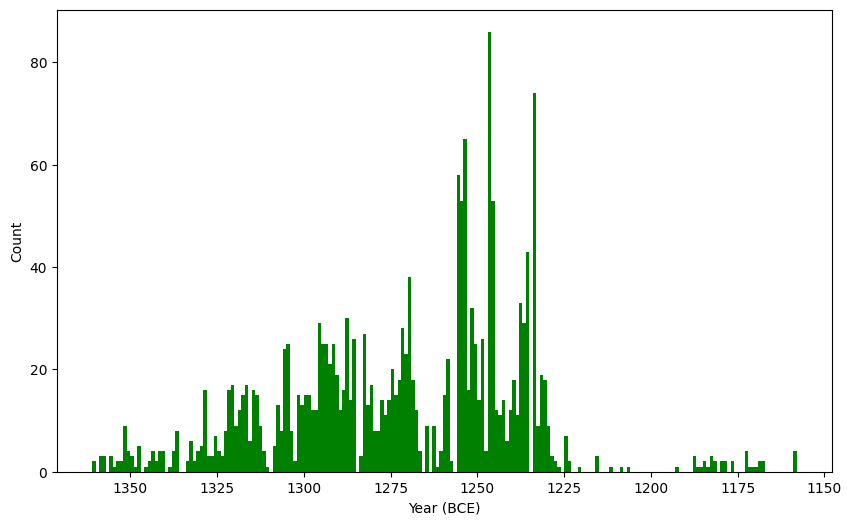

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(years, max(years)-min(years), range=(min(years),max(years)), color='green')
# ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
plt.gca().invert_xaxis()
ax.set_ylabel('Count')
ax.set_xlabel('Year (BCE)')
plt.show()

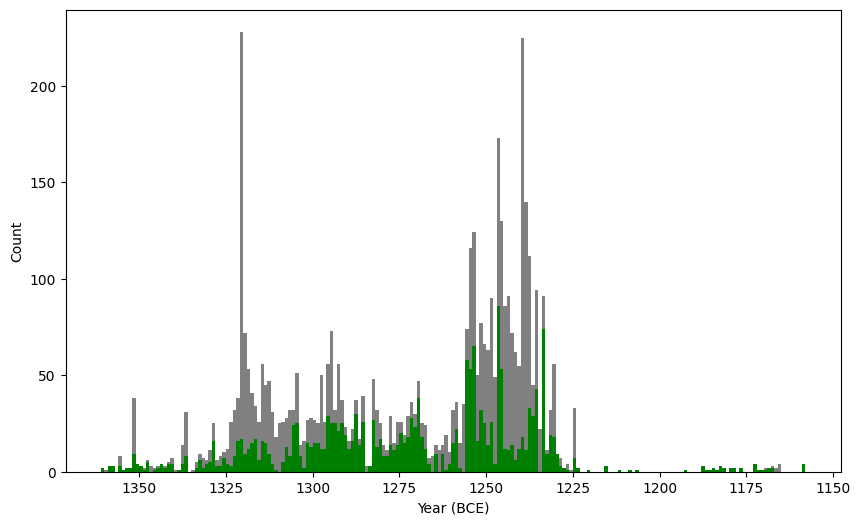

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist([years, preds], max(years)-min(years), range=(min(years),max(years)), stacked=True, color=['green','grey'])
# ax.axvline(0, color='k', linestyle='dashed', linewidth=1)
plt.gca().invert_xaxis()
ax.set_ylabel('Count')
ax.set_xlabel('Year (BCE)')
plt.show()

In [ ]:
18856/(1837+2972+18856)

0.7967885062328333

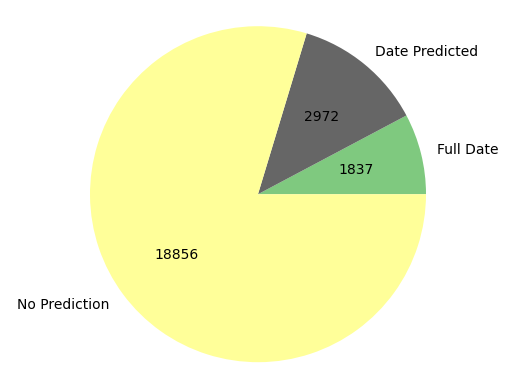

In [ ]:
data = {'Full Date': 1837,
'Date Predicted': 2972,
'No Prediction': 18856,}
labels = []
sizes = []

for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, colors = plt.get_cmap("Accent")([0,9,3]), autopct= lambda x: '{:.0f}'.format(x*sum(sizes)/100))

plt.axis('equal')
plt.show()

In [ ]:
141797 / (141797+211562)

0.4012831143398074

In [ ]:
5482 / (5482 + 347877)

0.015513967381614731

In [ ]:
MBTDB = [0.9999286885830422, 0.9998573771660842, 0.8407616059331099, 0.6144191685088782, 0.6129929401697212, 0.5973757398559509, 0.5952363973472153, 0.5918134493332382, 0.5844683733865792, 0.3536333166940027, 0.3301718605148684, 0.32282678456820935, 0.30136204806389505, 0.29972188547386436, 0.26905797618198674, 0.24388504599586394, 0.222705555159381, 0.1727162518719247, 0.17186051486843043, 0.16872281252228483, 0.15852527989731155, 0.15032446694715823, 0.1426228339157099, 0.12971546744633816, 0.10682450260286672, 0.09883762390358697, 0.09634172431006204, 0.09541467588960993, 0.09106467945518078, 0.08792697710903516, 0.07801469015189332, 0.06403765242815375, 0.04842045211438351, 0.04478356984953291, 0.042929473008628684, 0.042786850174712975, 0.040861441916850885, 0.036939313984168866, 0.034728660058475365, 0.03444341439064394, 0.03430079155672823, 0.034086857305854666, 0.02995079512229908, 0.029594238037509806, 0.025101618769164943, 0.023675390430007843, 0.021250802253440775, 0.0208942451686515, 0.020608999500820083, 0.020109819582115097, 0.019895885331241533, 0.018826214076873706, 0.01768523140554803, 0.017613919988590174, 0.017043428652927333, 0.01697211723596948, 0.016330314483348783, 0.016045068815517365, 0.01554588889681238, 0.014904086144191685, 0.014904086144191685, 0.01340654638807673, 0.011766383798046067, 0.010197532624973258, 0.00948441845539471, 0.009413107038436853, 0.009341795621478998, 0.00848605861798474, 0.007273764529701205, 0.00705983027882764, 0.006204093275333381, 0.006204093275333381, 0.005277044854881266, 0.005277044854881266, 0.005134422020965557, 0.004421307851387007, 0.003922127932682022, 0.0036368822648506025, 0.0036368822648506025, 0.0035655708478927474, 0.003494259430934893, 0.003494259430934893, 0.0033516365970191826, 0.003280325180061328, 0.002995079512229908, 0.0027811452613563433, 0.002638522427440633, 0.0025672110104827785, 0.002068031091777794, 0.0019254082578620837, 0.0019254082578620837, 0.0017827854239463737, 0.0017114740069885189, 0.001497539756114954, 0.0012836055052413893, 0.0012122940882835342, 0.0010696712543678242, 0.0009270484204521144, 0.0009270484204521144, 0.0009270484204521144, 0.0009270484204521144, 0.0009270484204521144, 0.0008557370034942594, 0.0008557370034942594, 0.0008557370034942594, 0.0007844255865364045, 0.0007844255865364045, 0.0006418027526206946, 0.0005704913356628397, 0.0005704913356628397, 0.0005704913356628397, 0.0004991799187049847, 0.0004991799187049847, 0.0004278685017471297, 0.0004278685017471297, 0.0004278685017471297, 0.00035655708478927474, 0.00021393425087356486, 7.131141695785496e-05, 0.0, 0.0]
MBPNS = [0.9999124496585536, 0.9840658378567676, 0.9718963403957276, 0.9623533531780774, 0.9505340570828226, 0.8722640518298022, 0.7722815618980914, 0.6389423918753283, 0.5100682892663282, 0.4979863421467344, 0.49325862370863244, 0.4926457713185081, 0.4920329189283838, 0.4911574155139205, 0.483628086149536, 0.47890036771143407, 0.47881281736998776, 0.47881281736998776, 0.47881281736998776, 0.46883207844510594, 0.4551742251794782, 0.45263526527753456, 0.45263526527753456, 0.45254771493608825, 0.45254771493608825, 0.30099807389248817, 0.2933811941866573, 0.21983890737173875, 0.21563649098231483, 0.16932236035720538, 0.14787252670285414, 0.13456487480301174, 0.13456487480301174, 0.13456487480301174, 0.1344773244615654, 0.13438977412011907, 0.1068114165645246, 0.07616879705830852, 0.05471896340395727, 0.05209245316056733, 0.04876554018560672, 0.04141131150411487, 0.03782174750481527, 0.025389599019436177, 0.021537383995797584, 0.018560672386622307, 0.01645946419191035, 0.014183155314305727, 0.01286990019261075, 0.01015583960777447, 0.009192785851864822, 0.008755034144633165, 0.0033269129749606023, 0.0030642619506216075, 0.001751006828926633, 0.0007004027315706532, 0.0005253020486779899, 0.0]
MBSLC = [0.9980732177263969, 0.9845857418111753, 0.9460500963391136, 0.9325626204238922, 0.651252408477842, 0.6088631984585742, 0.6088631984585742, 0.5375722543352601, 0.5298651252408478, 0.49710982658959535, 0.4682080924855491, 0.464354527938343, 0.4508670520231214, 0.41811175337186895, 0.40655105973025046, 0.4007707129094412, 0.37764932562620424, 0.36801541425818884, 0.35260115606936415, 0.3333333333333333, 0.3236994219653179, 0.3198458574181118, 0.3179190751445087, 0.31021194605009633, 0.2909441233140655, 0.2909441233140655, 0.28901734104046245, 0.28901734104046245, 0.279383429672447, 0.2774566473988439, 0.2774566473988439, 0.2697495183044316, 0.2658959537572254, 0.2466281310211946, 0.2466281310211946, 0.24084778420038536, 0.22350674373795762, 0.21965317919075145, 0.2003853564547206, 0.1907514450867052, 0.18882466281310212, 0.16570327552986513, 0.16184971098265896, 0.14065510597302505, 0.1348747591522158, 0.1348747591522158, 0.10597302504816955, 0.09441233140655106, 0.09441233140655106, 0.08863198458574181, 0.08670520231213873, 0.08092485549132948, 0.0789980732177264, 0.07514450867052024, 0.07514450867052024, 0.05009633911368015, 0.046242774566473986, 0.04431599229287091, 0.04046242774566474, 0.04046242774566474, 0.04046242774566474, 0.038535645472061654, 0.03275529865125241, 0.03275529865125241, 0.028901734104046242, 0.025048169556840076, 0.025048169556840076, 0.023121387283236993, 0.023121387283236993, 0.023121387283236993, 0.023121387283236993, 0.02119460500963391, 0.02119460500963391, 0.019267822736030827, 0.017341040462427744, 0.017341040462427744, 0.017341040462427744, 0.015414258188824663, 0.015414258188824663, 0.01348747591522158, 0.01348747591522158, 0.01348747591522158, 0.011560693641618497, 0.011560693641618497, 0.011560693641618497, 0.009633911368015413, 0.005780346820809248, 0.0038535645472061657, 0.0019267822736030828, 0.0019267822736030828, 0.0019267822736030828, 0.0, 0.0, 0.0]
MBTED = [0.9999240640899081, 7.593591009188245e-05, 7.593591009188245e-05, 7.593591009188245e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
CDLI = [0.9999971694080949, 0.9999971694080949, 0.9892748872716773, 0.9227956057891266, 0.872781877418387, 0.8726092113121775, 0.8615359357795308, 0.8461460075916475, 0.7880537699238288, 0.7287585306963539, 0.7210395065712191, 0.7063827016867498, 0.6858495880073482, 0.60382752637404, 0.5992787651825874, 0.5523985020507638, 0.5520050497759587, 0.5321541087456798, 0.4502848990752456, 0.44929419190847, 0.41721226325636956, 0.41718395733731883, 0.2929606009912733, 0.2888194450341511, 0.23604872014787012, 0.23473249491201106, 0.20450177336582853, 0.2033185859495079, 0.16187872045923524, 0.15945856438039757, 0.14919200754069684, 0.13933022534342157, 0.09722800134736174, 0.09061007747330044, 0.08485265353838141, 0.08220038892332776, 0.07411904903434358, 0.06884848690709715, 0.05927259449223427, 0.056238199969995725, 0.050574185567944116, 0.04451954948299239, 0.04090205302830875, 0.038128072961336947, 0.036135336260165365, 0.03537107644579558, 0.03501159127385128, 0.02478466272082155, 0.022101261594812092, 0.021291712309961137, 0.020852970564674778, 0.017328883642858558, 0.015398419963598588, 0.01428316675299972, 0.01264708463186737, 0.01236968662517019, 0.009581553598673019, 0.005836680508261083, 0.0050724206938913, 0.004387417452863568, 0.0004132664181406974, 0.00015568255477902985, 2.83059190507327e-06, 0.0]

Text(0.5, 0, 'Columns (sorted)')

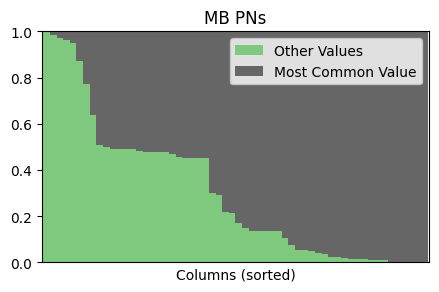

In [ ]:
d = pd.DataFrame([MBPNS, [1-x for x in MBPNS]]).T
d.columns = ['Other Values', 'Most Common Value']
d.plot(kind='bar', stacked=True, figsize=(5, 3), width=1, colormap='Accent')
plt.ylim(0,1)
plt.xticks([])
plt.title('MB PNs')
plt.xlabel("Columns (sorted)")

In [ ]:
np.mean([x < 0.1 for x in CDLI + MBTDB])

0.6918918918918919

In [ ]:
timings = [
[417,	315],
[337,	350],
[210,	110],
[221,	202],
[243,	131],
[185,	258]]

Text(0, 0.5, 'Time (s)')

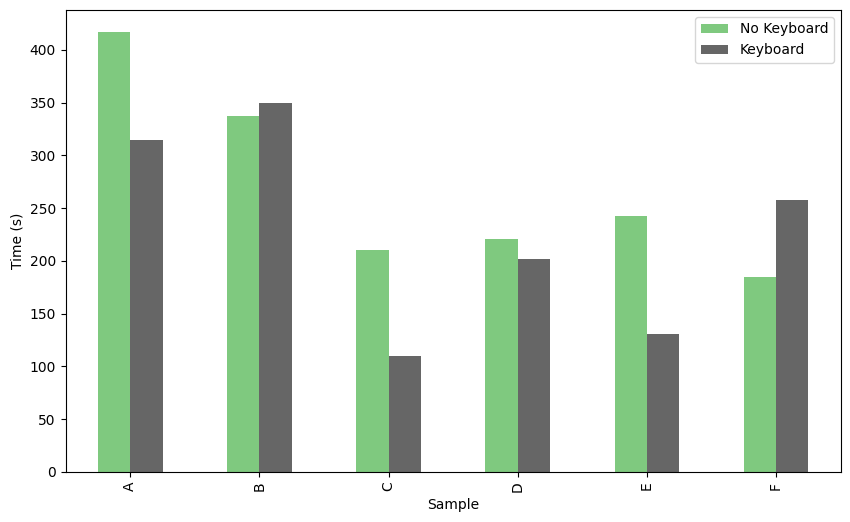

In [ ]:
ax = pd.DataFrame(timings, columns=['No Keyboard', 'Keyboard'], index=['A', 'B', 'C', 'D', 'E', 'F']).plot(kind='bar', figsize=(10, 6), colormap='Accent')
ax.set_xlabel("Sample")
ax.set_ylabel("Time (s)")

In [ ]:
import cmap = matplotlib.cm.get_cmap('Accent')

<ipython-input-14-c7a388db9e59>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Accent')


In [ ]:
cmap(0)

(0.4980392156862745, 0.788235294117647, 0.4980392156862745, 1.0)

[785, 577, 298, 109, 35, 7, 0, 0]


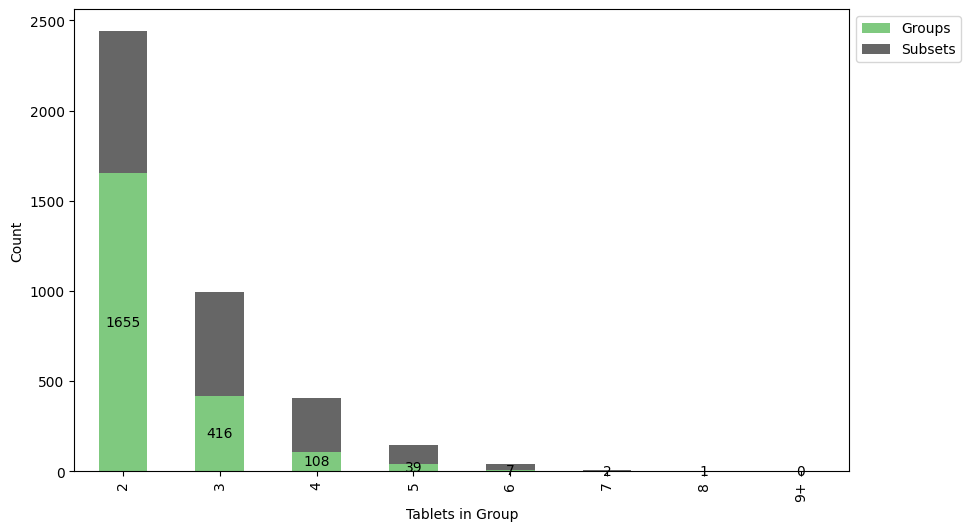

In [ ]:
y1 = [2440, 993, 406, 148, 42, 9, 1, 0]
y2 = [1655, 416, 108, 39, 7, 2, 1, 0]

x_axis = ['2', '3', '4', '5', '6', '7', '8', '9+']
# y1 = [26623, 168, 18, 0]
# y2 = [22572, 0, 0, 0]
y3 = list(np.array(y1)-np.array(y2))
print(y3)

index = pd.Index(x_axis, name='Tablets in Group')

data = {'Groups': y2, 'Subsets': y3}
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='center')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

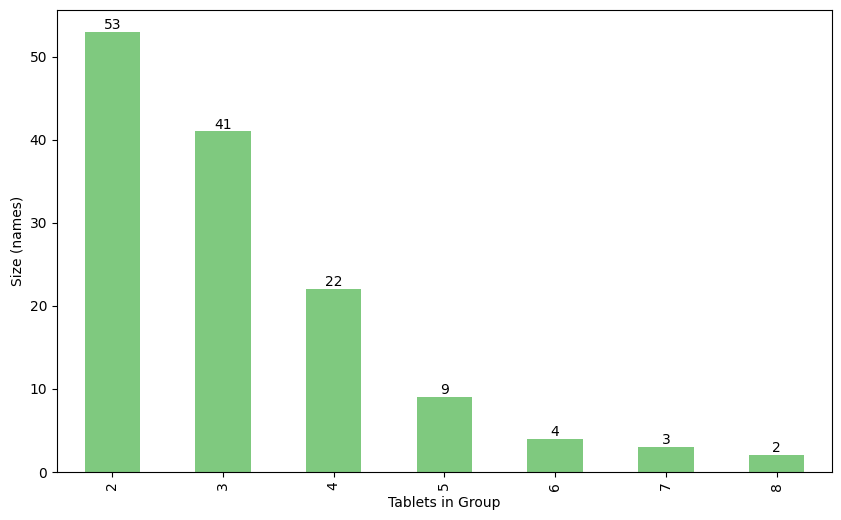

In [ ]:
counts_0 = {2: 53, 3: 41, 4: 22, 5: 9, 6: 4, 7: 3, 8:2}

def chart_counts(counts):
  for i in range(2, max(counts.keys())):
    if i not in counts.keys():
      counts[i]=0
  counts = {x: counts[x] for x in sorted(counts.keys())}
  df = pd.DataFrame(counts.values(), index=counts.keys())
  ax = df.plot(kind='bar', figsize=(10, 6), colormap='Accent')
  ax.set_ylabel('Size (names)')
  ax.set_xlabel('Tablets in Group')
  ax.bar_label(ax.containers[0], label_type='edge')
  # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.get_legend().remove()
  plt.show()

chart_counts(counts_0)

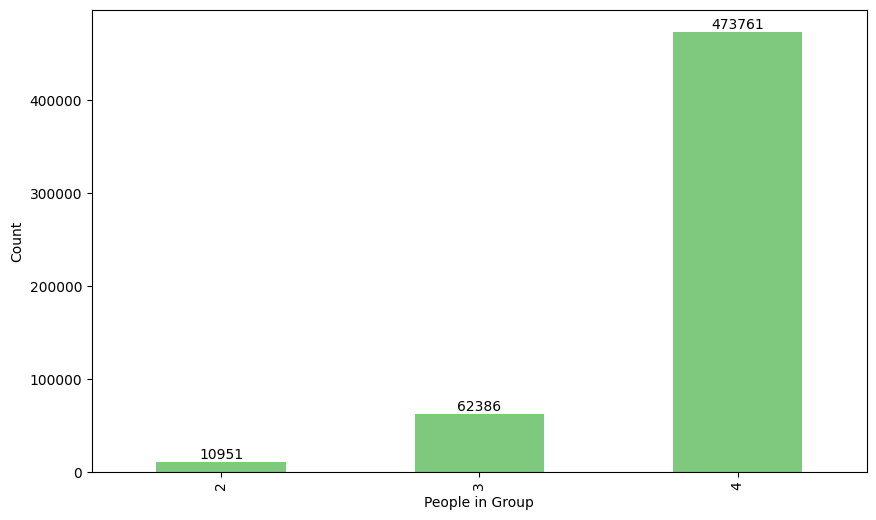

In [6]:

counts_0 = {2: 10951, 3: 62386, 4: 473761}

def chart_counts(counts):
  for i in range(2, max(counts.keys())):
    if i not in counts.keys():
      counts[i]=0
  counts = {x: counts[x] for x in sorted(counts.keys())}
  df = pd.DataFrame(counts.values(), index=counts.keys())
  ax = df.plot(kind='bar', figsize=(10, 6), colormap='Accent')
  ax.set_ylabel('Count')
  ax.set_xlabel('People in Group')
  ax.bar_label(ax.containers[0], label_type='edge')
  # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.get_legend().remove()
  plt.show()

chart_counts(counts_0)

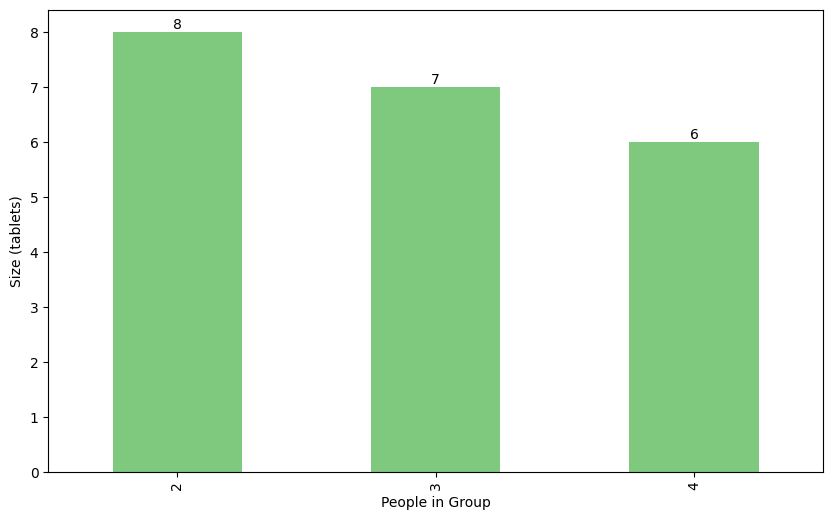

In [7]:
counts_0 = {2: 8, 3: 7, 4: 6}

def chart_counts(counts):
  for i in range(2, max(counts.keys())):
    if i not in counts.keys():
      counts[i]=0
  counts = {x: counts[x] for x in sorted(counts.keys())}
  df = pd.DataFrame(counts.values(), index=counts.keys())
  ax = df.plot(kind='bar', figsize=(10, 6), colormap='Accent')
  ax.set_ylabel('Size (tablets)')
  ax.set_xlabel('People in Group')
  ax.bar_label(ax.containers[0], label_type='edge')
  # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.get_legend().remove()
  plt.show()

chart_counts(counts_0)

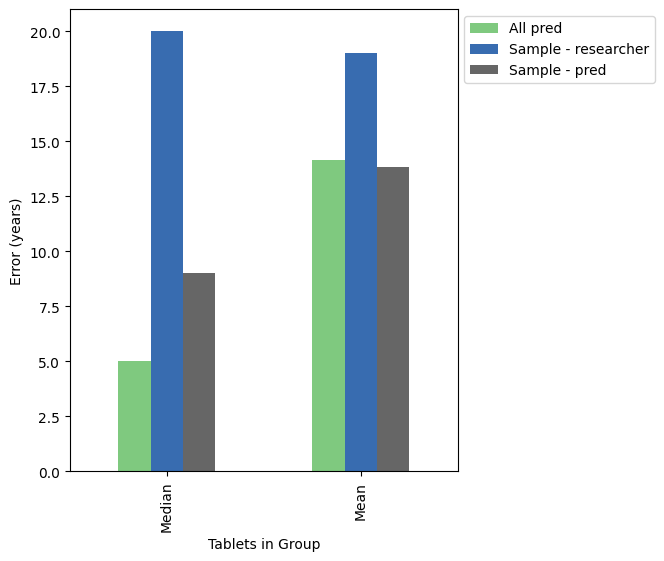

In [15]:
y1 = [5, 14.16]
y2 = [20, 19]
y3 = [9, 13.8]

x_axis = ['Median', 'Mean']

index = pd.Index(x_axis, name='Tablets in Group')

data = {'All pred': y1, 'Sample - researcher': y2, 'Sample - pred': y3}
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=False, figsize=(5, 6), colormap='Accent')
ax.set_ylabel('Error (years)')
# ax.bar_label(ax.containers[0], label_type='center')
# ax.bar_label(ax.containers[1], label_type='center')
# ax.bar_label(ax.containers[2], label_type='center')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

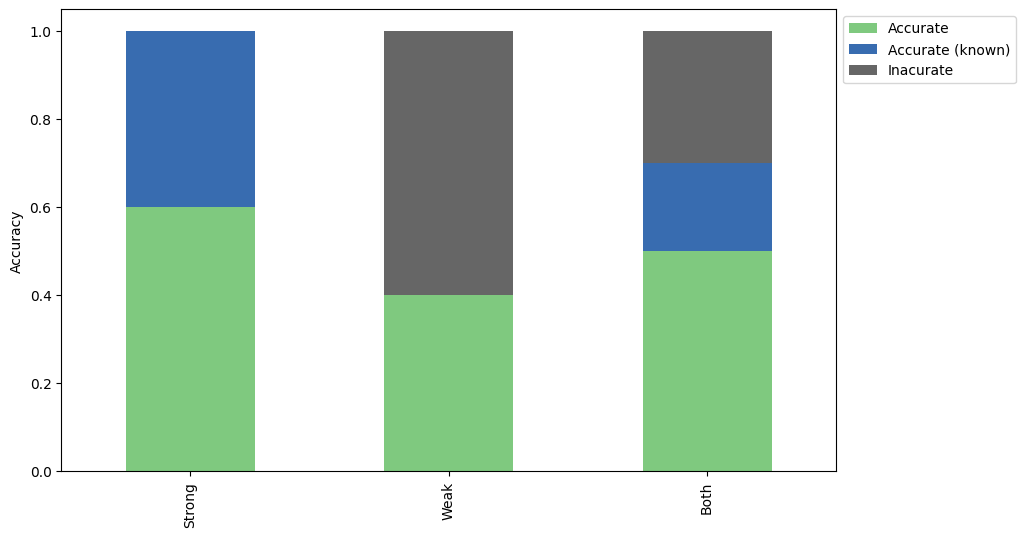

In [7]:
y1 = [0.0, 0.6, 0.3]
y2 = [0.6, 0.4, 0.5]
y3 = [0.4, 0.0, 0.2]

x_axis = ['Strong', 'Weak', 'Both']

index = pd.Index(x_axis)

data = {'Accurate': y2, 'Accurate (known)': y3, 'Inacurate': y1,}
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
ax.set_ylabel('Accuracy')
# ax.bar_label(ax.containers[0], label_type='center')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()